# K-Nearest Neighbors (KNN) Implementation 
----
This code allows you to select a school district and locate its K nearest neighbors. 
 

## Importing packages, lists, and functions 

Importing Necessary Packages 

In [1]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import linkage, dendrogram
import geopandas as gpd
import textwrap
from matplotlib.patches import ConnectionPatch
from scipy.spatial import Voronoi


Importing demographic buckets from Demographic_Buckets.py file (Demographic buckets to run model on)

In [2]:
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
from Demographic_Buckets import student_teacher_ratio
from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import district_identifiers

Importing modeling functions from the KNN_Model.py file (containing all functions used for this analysis)

In [3]:
from KNN_Model import calculate_missing_percentage
from KNN_Model import drop_columns
from KNN_Model import preprocess_data
from KNN_Model import knn_distance
from KNN_Model import knn_cosine
from KNN_Model import knn_canberra
from KNN_Model import find_nearest_districts
from KNN_Model import get_neighbor_data

Importing diagnostic plot functions from the KNN_Diagnostic_Plots.py file (containing all functions used for this analysis)

In [4]:
from KNN_Diagnostic_Plots import plot_texas_districts
from KNN_Diagnostic_Plots import plot_race_ethnicity_stacked_bar
from KNN_Diagnostic_Plots import plot_class_size_k6_bar
from KNN_Diagnostic_Plots import plot_special_ed_504_bar

## Reading in Data & Cleaning

In [5]:
#Reading in the data
os.chdir(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\4_Data_Modeling\4.2_KNN_Clustering")
df = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.7Master_Files\Individual Year Files_Take2\merged_2023.csv")
distgrad = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distgrad_2023_clean.csv")
distprof = pd.read_csv(r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\1.6Data2023\District\clean_data\distprof_2023_clean.csv")
df = df[df['Charter School (Y/N)'] == 'N']
demographic_df = df[student_teacher_ratio + student_count + staff_count + race_ethnicity_percent + economically_disadvantaged +
                    special_ed_504 + language_education_percent + special_populations_percent + gifted_students +
                    district_identifiers]

# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Replace negative values with NaN only in numeric columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, np.nan)


#plt.hist(calculate_missing_percentage(demographic_df) / 100)
#plt.title("Histogram of percentage of NA values in columns within demographic attributes")
#demographic_df


Key takaways, the demographic data contains very few columns with a lot of NAs! The outcome oriented data on the other hand varies slightly. Regardless, the data science portion (fitting a knn model) will occur on mostly complete data

## Fitting model on Houston ISD to find 5 nearest neighbors for different distance metrics
---
Target District: Houston ISD (101912)  
Feature buckets used:   
* race_ethnicity_percent  
* student_teacher_ratio
* special_ed_504   


Number of Neighbors: 5   
Imputation Strategy: Median  


Distance Metric: euclidean
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD
1137       237902  HEMPSTEAD ISD


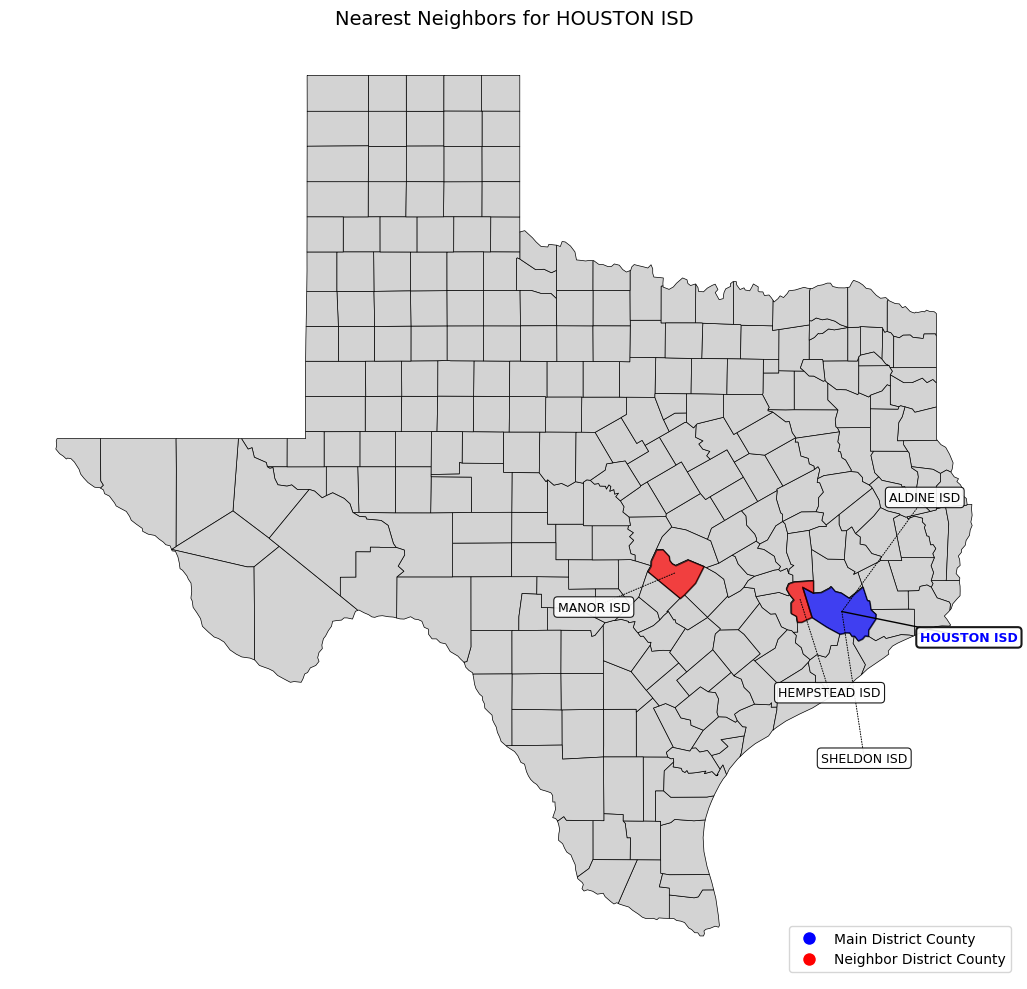

HOUSTON ISD


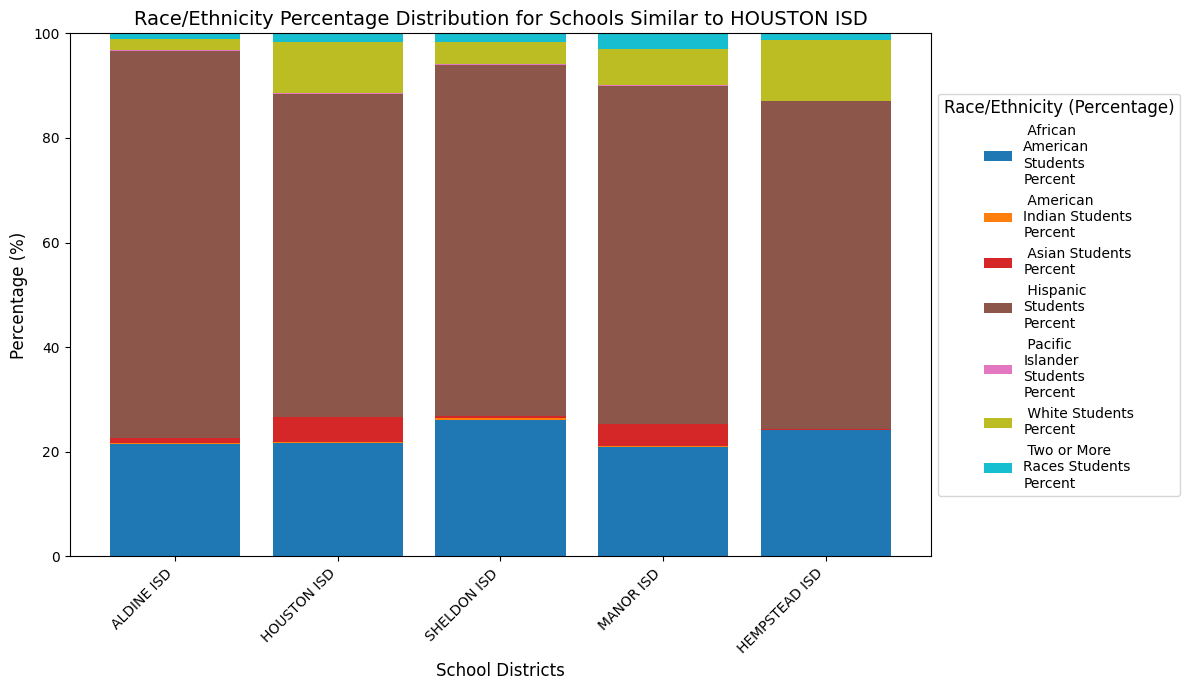

Input District: HOUSTON ISD


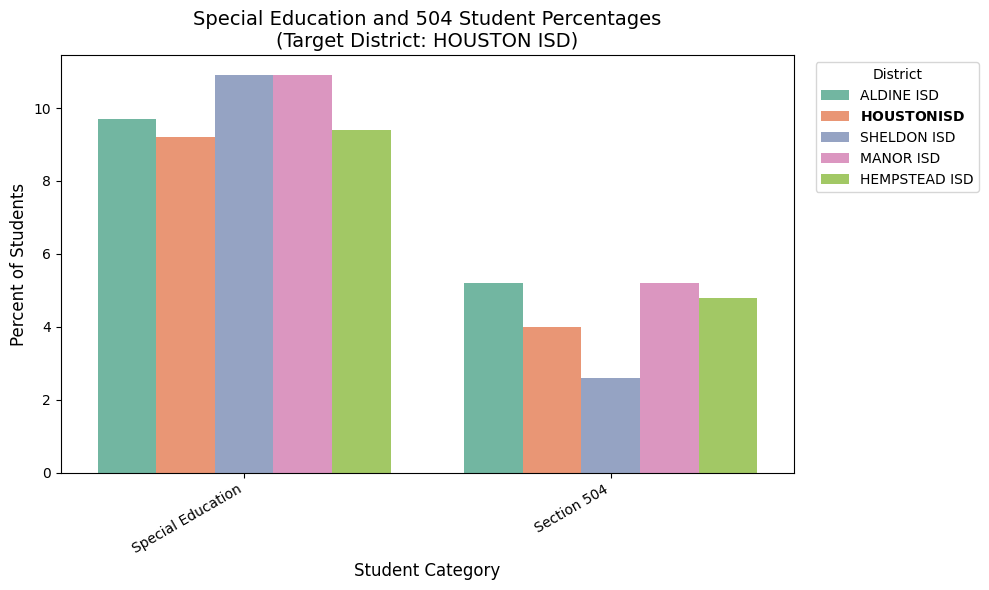

Distance Metric: manhattan
      DISTRICT_id       DISTNAME
532        101912    HOUSTON ISD
524        101902     ALDINE ISD
1137       237902  HEMPSTEAD ISD
1093       227907      MANOR ISD
541        101924    SHELDON ISD


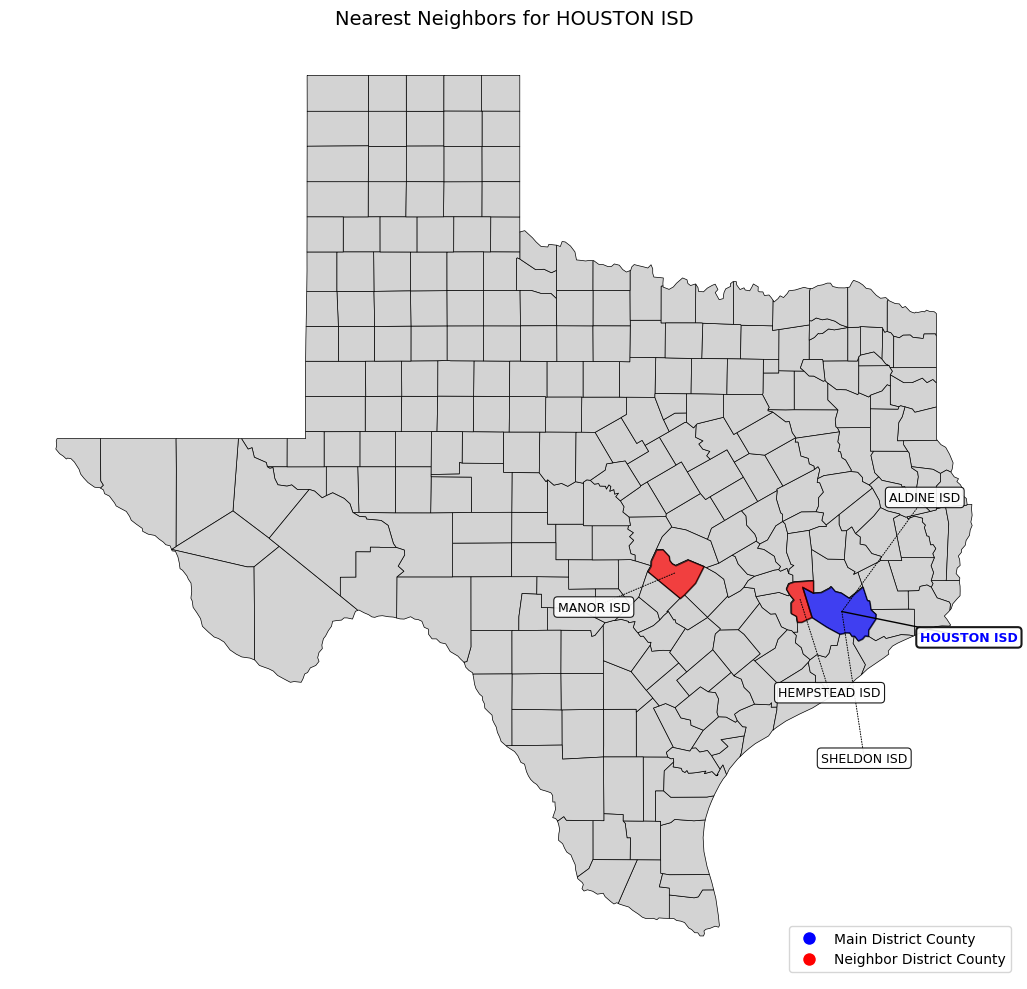

HOUSTON ISD


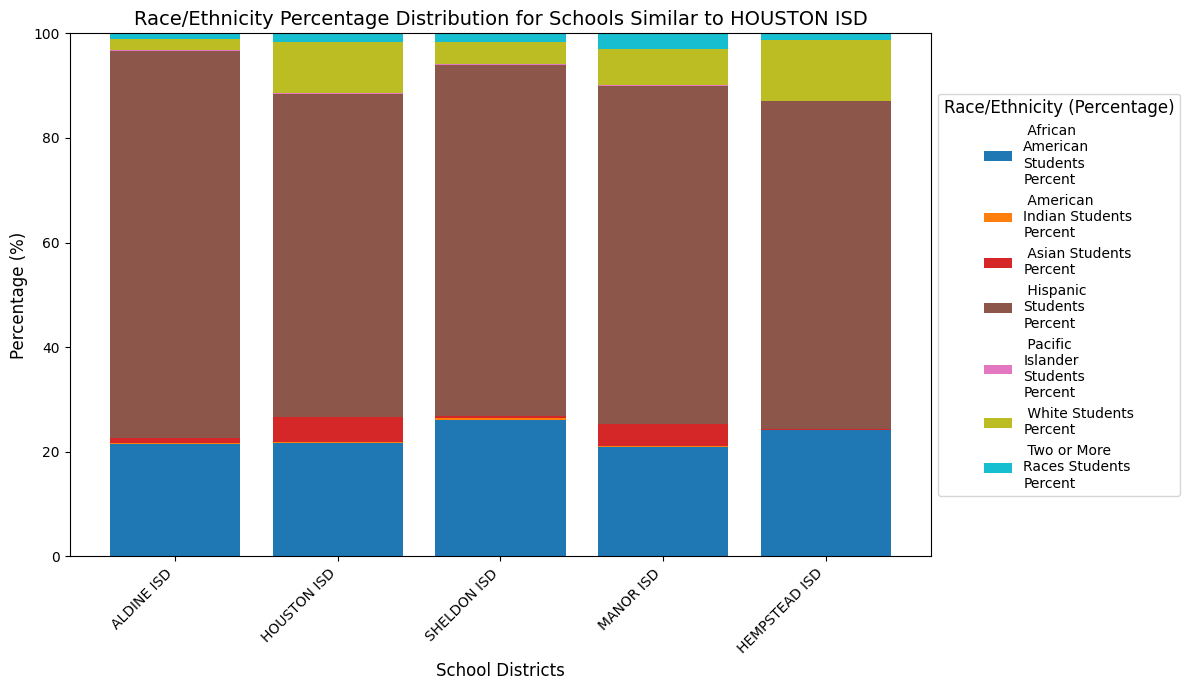

Input District: HOUSTON ISD


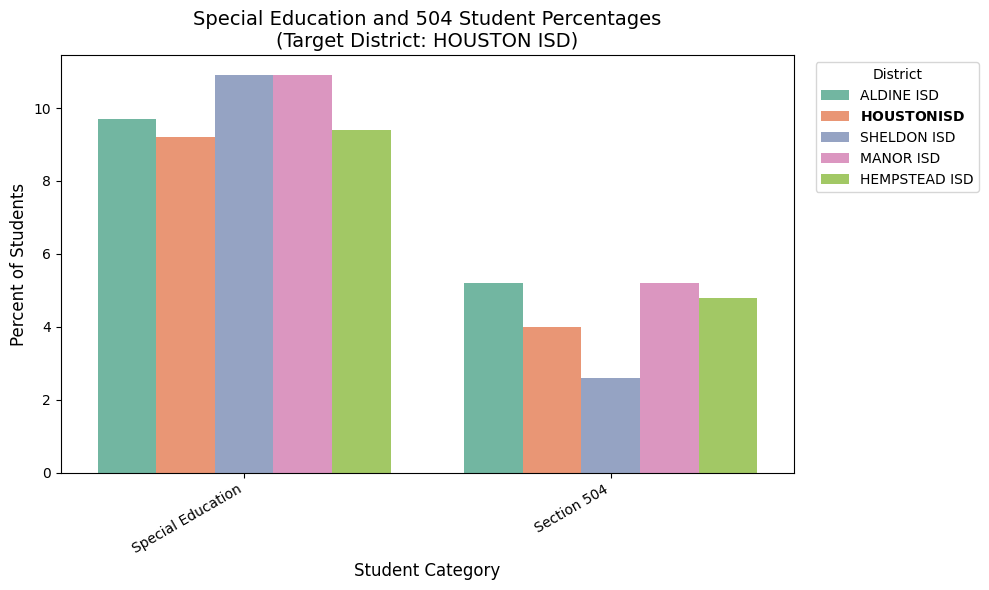

Distance Metric: mahalanobis
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
541        101924     SHELDON ISD
1137       237902   HEMPSTEAD ISD
1037       220901   ARLINGTON ISD
1040       220905  FORT WORTH ISD


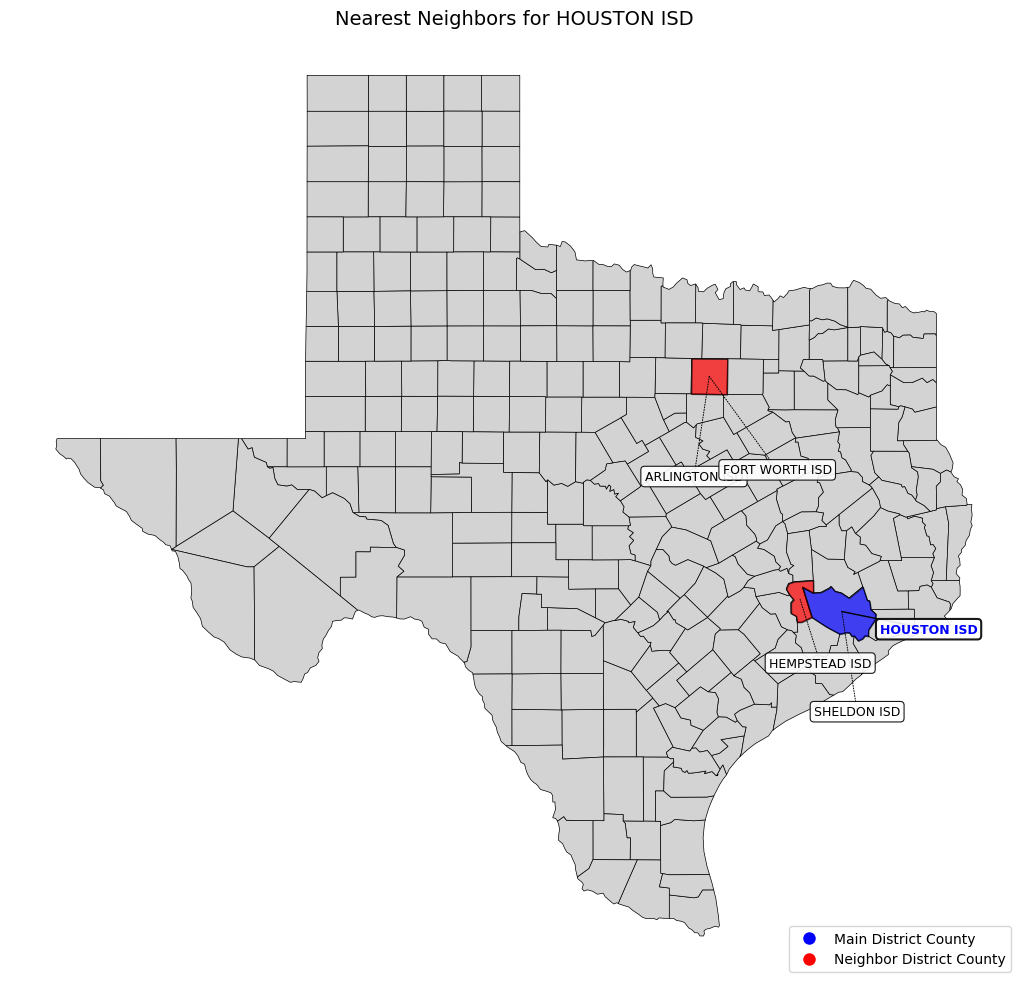

HOUSTON ISD


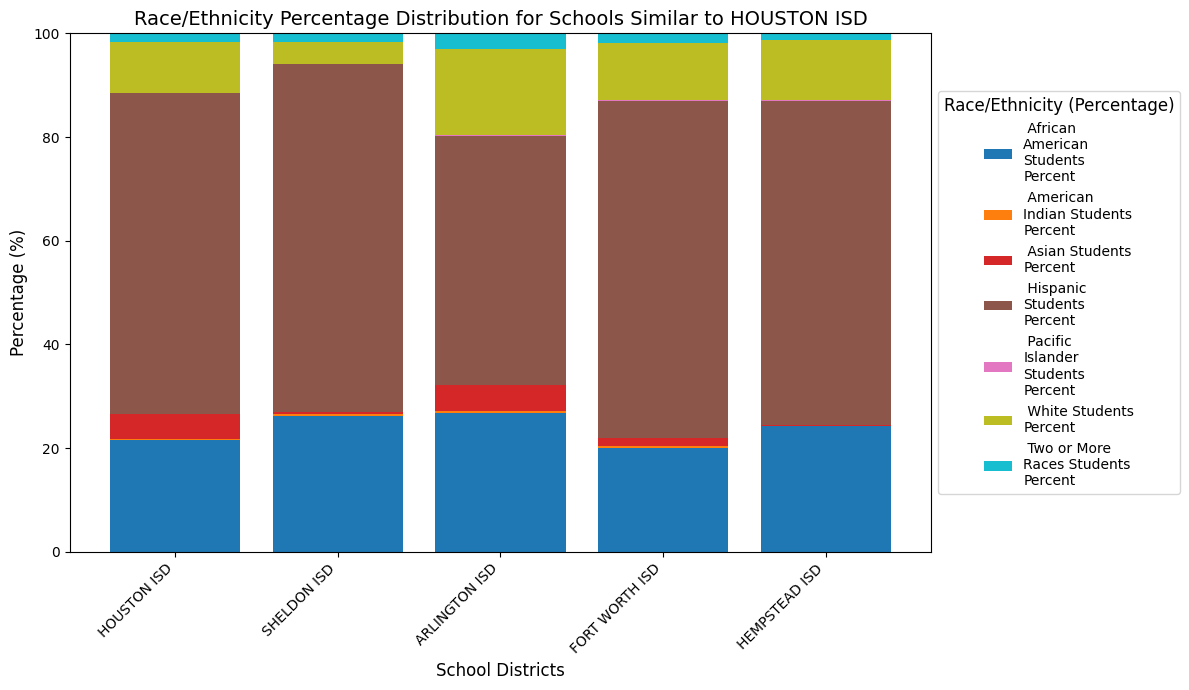

Input District: HOUSTON ISD


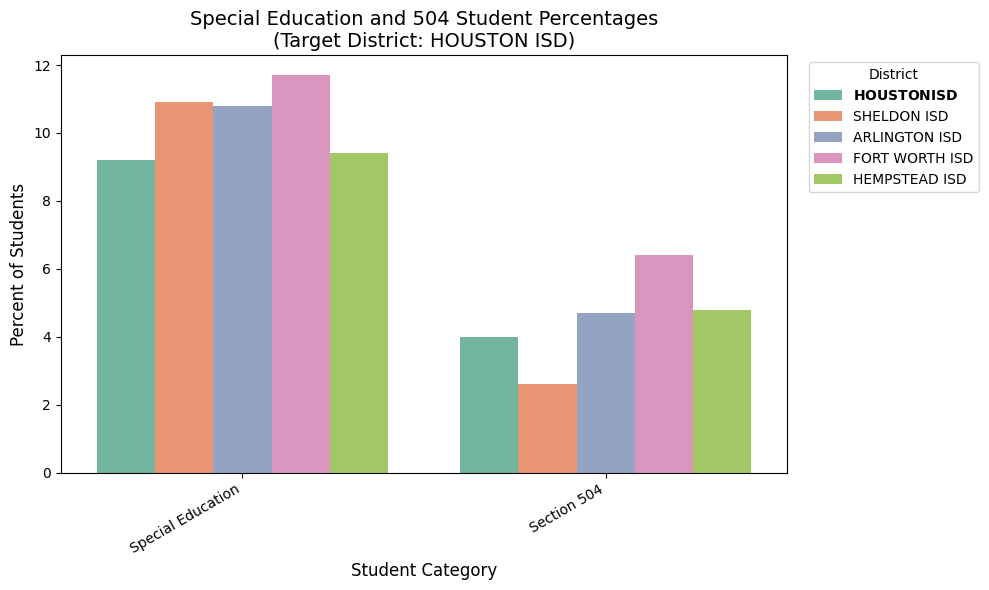

Distance Metric: cosine
      DISTRICT_id        DISTNAME
532        101912     HOUSTON ISD
1093       227907       MANOR ISD
1137       237902   HEMPSTEAD ISD
1040       220905  FORT WORTH ISD
1151       241904     WHARTON ISD


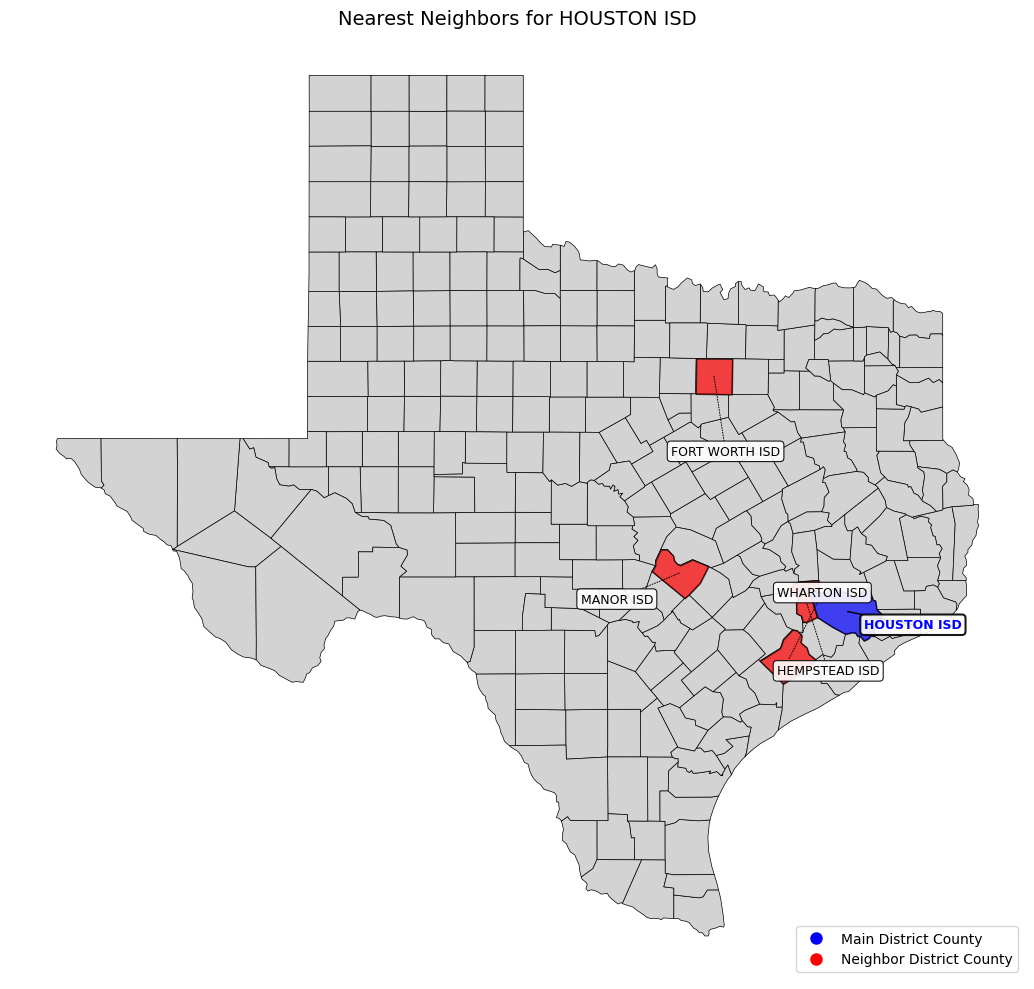

HOUSTON ISD


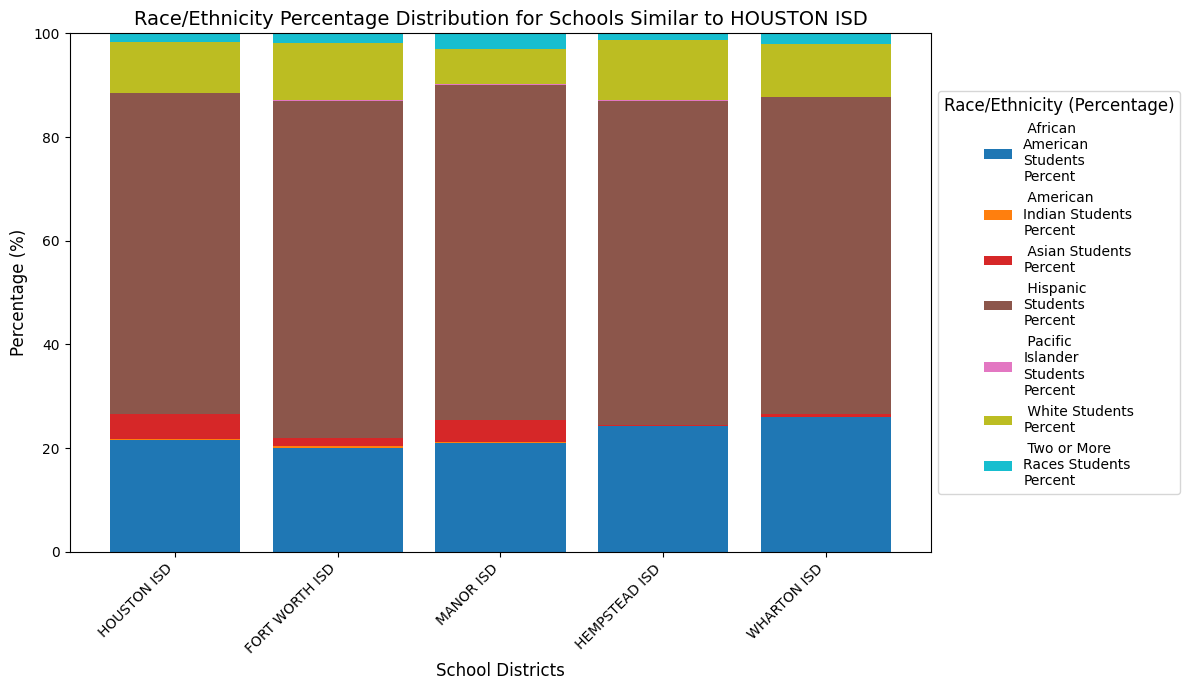

Input District: HOUSTON ISD


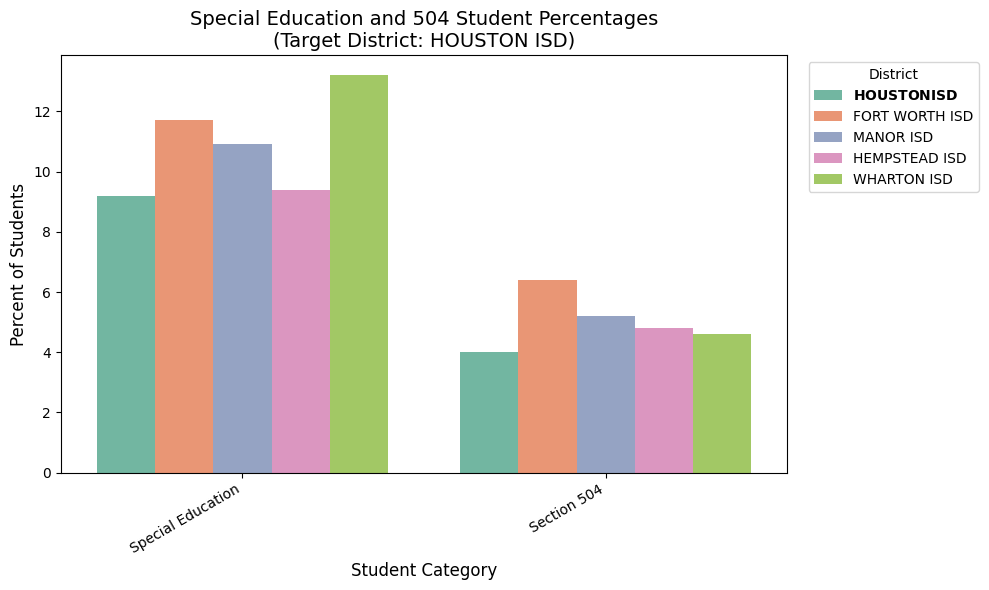

Distance Metric: canberra
      DISTRICT_id           DISTNAME
532        101912        HOUSTON ISD
1040       220905     FORT WORTH ISD
289         57910  GRAND PRAIRIE ISD
1093       227907          MANOR ISD
1139       237905          ROYAL ISD


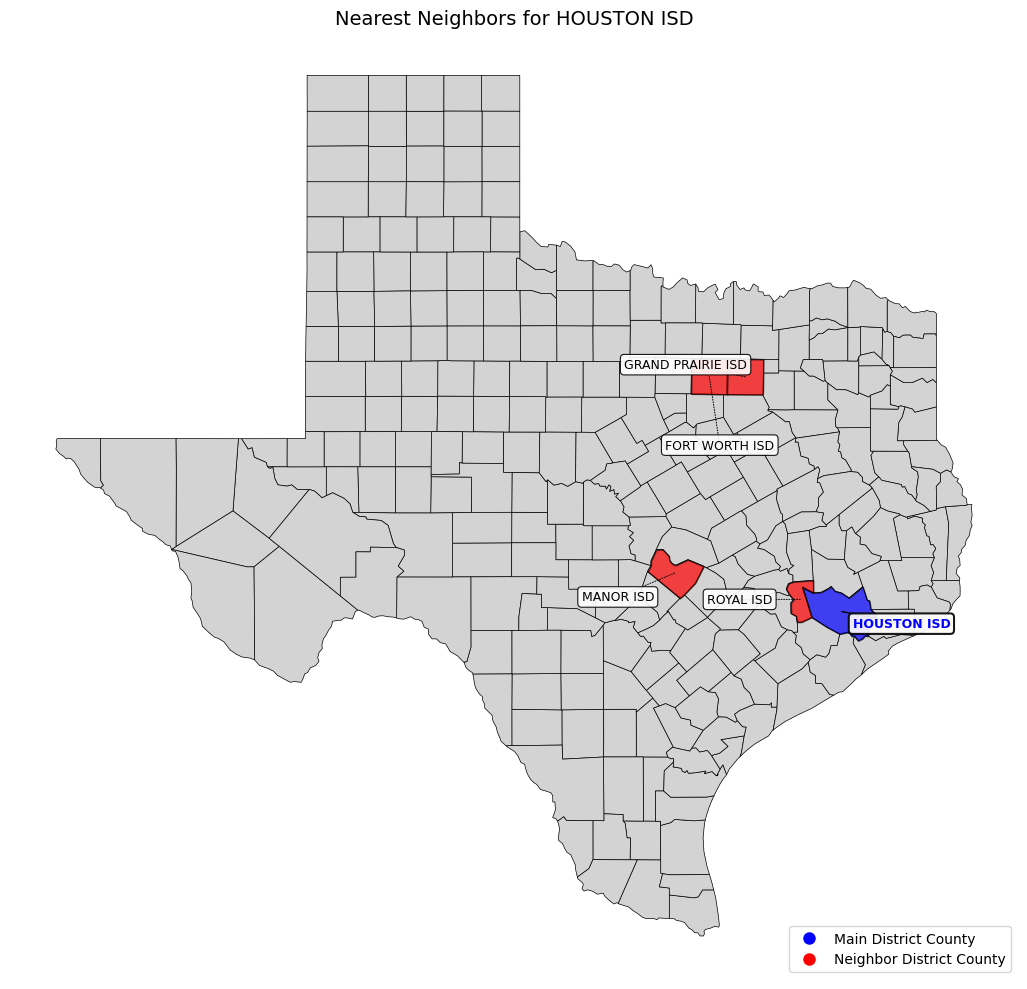

HOUSTON ISD


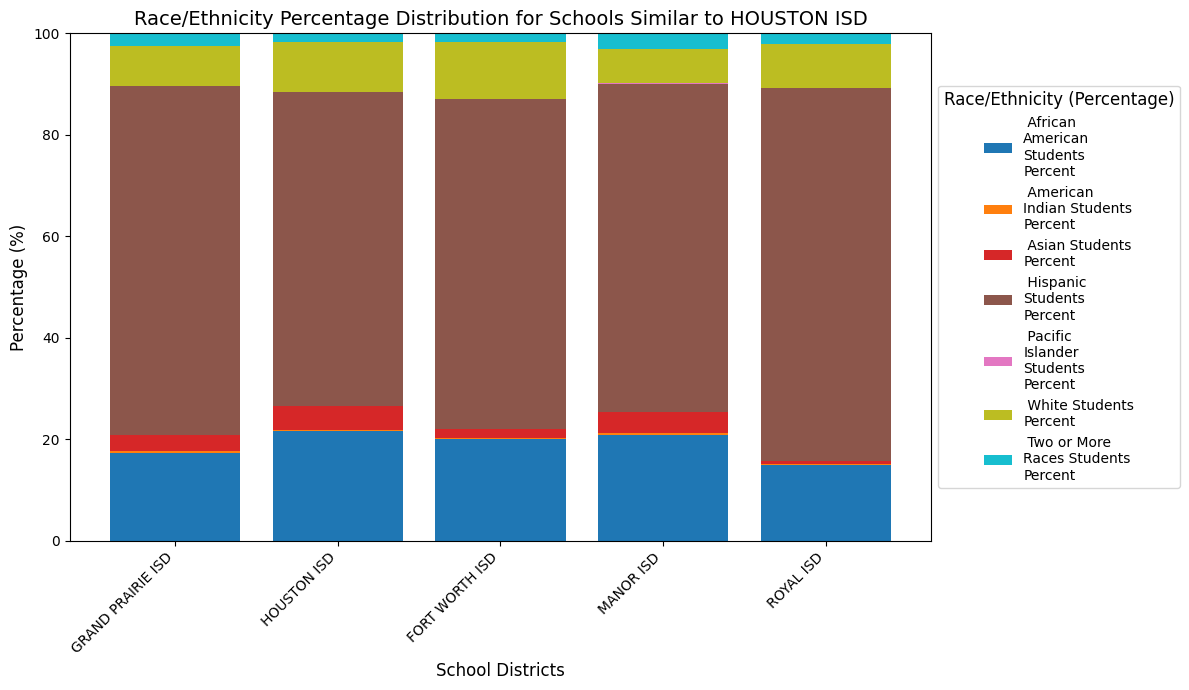

Input District: HOUSTON ISD


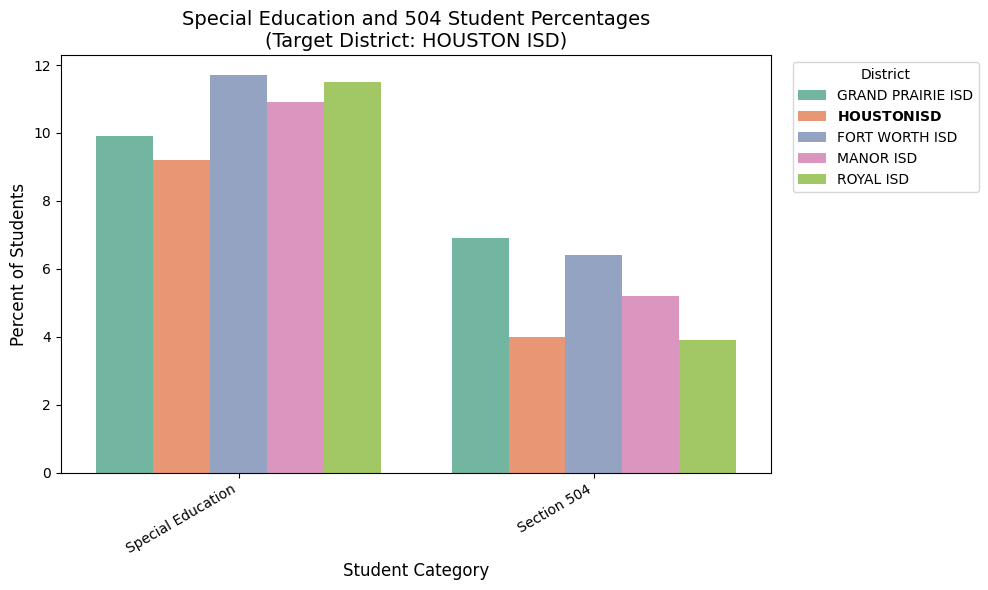

In [7]:
distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra']
selected_features = race_ethnicity_percent +  student_teacher_ratio + special_ed_504

for distance_metric in distance_metrics: 
    print(f"Distance Metric: {distance_metric}")
    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
    print(knn_model)
    plot_texas_districts(knn_model, df)
    plot_race_ethnicity_stacked_bar(knn_model, df)
    plot_special_ed_504_bar(knn_model, df)
    
    

In [ ]:
possible_features = [
    'student_teacher_ratio',
    'student_count',
    'staff_count',
    'race_ethnicity_percent',
    'economically_disadvantaged',
    'special_ed_504',
    'language_education_percent',
    'special_populations_percent',
    'gifted_students',
    'district_identifiers'
]

distance_metrics = [
    'euclidean',
    'manhattan',
    'mahalanobis',
    'cosine',
    'canberra']

nearest_neighbors = find_nearest_districts(df, 101912, student_teacher_ratio, 5, "Euclidean", "median") 
neighbors_df = get_neighbor_data(df, student_teacher_ratio, nearest_neighbors)
neighbors_df[neighbors_df.columns.difference(district_identifiers)]


#for distance_metric in distance_metrics: 
#    #print(f"Distance Metric: {distance_metric}")
#    knn_model = find_nearest_districts(df, 101912, selected_features, 5, distance_metric, "median")
#    test = get_neighbor_data(df, selected_features, knn_model)
#    print(test)
#    #plot_texas_districts(knn_model, df)
    #plot_race_ethnicity_stacked_bar(knn_model, df)
    #plot_special_ed_504_bar(knn_model, df)

,DISTNAME_x,DISTNAME_y,District 2023 Staff: Teacher Student Ratio
0,ELGIN ISD,ELGIN ISD,17.6
1,LAMAR CISD,LAMAR CISD,17.8
2,HOUSTON ISD,HOUSTON ISD,18.0
3,EAGLE PASS ISD,EAGLE PASS ISD,17.4
4,WILLIS ISD,WILLIS ISD,17.9
